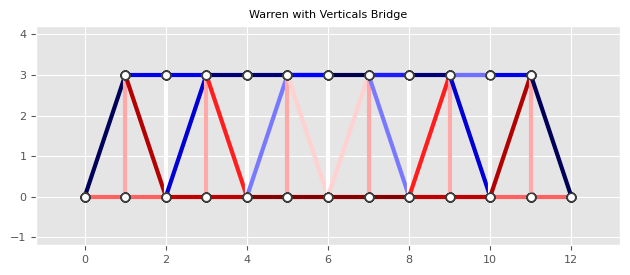

In [1]:
import numpy as np
from plane_trusses import analysis
from analisis_cerchas import *  # Asegúrate de que este módulo tenga las funciones requeridas
import matplotlib.pyplot as plt  # Asegúrate de importar matplotlib para la visualización

# Definir nodos (coordenadas de cada nodo en la cercha)
nodes = np.array([
    [0.0, 0.0],    # Nodo 0: Soporte izquierdo
    [1.0, 0.0],    # Nodo 1
    [2.0, 0.0],    # Nodo 2
    [3.0, 0.0],    # Nodo 3
    [4.0, 0.0],    # Nodo 4
    [5.0, 0.0],    # Nodo 5
    [6.0, 0.0],    # Nodo 6: Soporte derecho
    [7.0, 0.0],    # Nodo 7
    [8.0, 0.0],    # Nodo 8
    [9.0, 0.0],    # Nodo 9
    [10.0, 0.0],   # Nodo 10
    [11.0, 0.0],   # Nodo 11
    [12.0, 0.0],   # Nodo 12: Soporte derecho
    [1.0, 3.0],    # Nodo 13: Nodo superior entre 0 y 1
    [2.0, 3.0],    # Nodo 14: Nodo superior entre 1 y 2
    [3.0, 3.0],    # Nodo 15: Nodo superior entre 2 y 3
    [4.0, 3.0],    # Nodo 16: Nodo superior entre 3 y 4
    [5.0, 3.0],    # Nodo 17: Nodo superior entre 4 y 5
    [6.0, 3.0],    # Nodo 18: Nodo superior entre 5 y 6
    [7.0, 3.0],    # Nodo 19: Nodo superior entre 6 y 7
    [8.0, 3.0],    # Nodo 20: Nodo superior entre 7 y 8
    [9.0, 3.0],    # Nodo 21: Nodo superior entre 8 y 9
    [10.0, 3.0],   # Nodo 22: Nodo superior entre 9 y 10
    [11.0, 3.0],   # Nodo 23: Nodo superior entre 10 y 11
])

# Definir restricciones (0 = libre, -1 = fijo en esa dirección)
# [x_constraint, y_constraint] para cada nodo
cons = np.array([
    [-1, -1],   # Nodo 0: Fijo en y (Soporte izquierdo)
    [0, 0],    # Nodo 1: Libre
    [0, 0],    # Nodo 2: Libre
    [0, 0],    # Nodo 3: Libre
    [0, 0],    # Nodo 4: Libre
    [0, 0],    # Nodo 5: Libre
    [0, 0],   # Nodo 6: Fijo en y (Soporte derecho)
    [0, 0],    # Nodo 7: Libre
    [0, 0],    # Nodo 8: Libre
    [0, 0],    # Nodo 9: Libre
    [0, 0],    # Nodo 10: Libre
    [0, 0],    # Nodo 11: Libre
    [0, -1],   # Nodo 12: Fijo en y (Soporte derecho)
    [0, 0],    # Nodo 13: Libre
    [0, 0],    # Nodo 14: Libre
    [0, 0],    # Nodo 15: Libre
    [0, 0],    # Nodo 16: Libre
    [0, 0],    # Nodo 17: Libre
    [0, 0],    # Nodo 18: Libre
    [0, 0],    # Nodo 19: Libre
    [0, 0],    # Nodo 20: Libre
    [0, 0],    # Nodo 21: Libre
    [0, 0],    # Nodo 22: Libre
    [0, 0],    # Nodo 23: Libre
], dtype=int)

# Definir elementos (conectividad e índice de propiedades del material)
# [material_index, start_node, end_node]
elements = np.array([
    # Chord inferior (entre nodos inferiores)
    [0, 0, 1],  # Entre Nodo 0 y Nodo 1
    [0, 1, 2],  # Entre Nodo 1 y Nodo 2
    [0, 2, 3],  # Entre Nodo 2 y Nodo 3
    [0, 3, 4],  # Entre Nodo 3 y Nodo 4
    [0, 4, 5],  # Entre Nodo 4 y Nodo 5
    [0, 5, 6],  # Entre Nodo 5 y Nodo 6
    [0, 6, 7],  # Entre Nodo 6 y Nodo 7
    [0, 7, 8],  # Entre Nodo 7 y Nodo 8
    [0, 8, 9],  # Entre Nodo 8 y Nodo 9
    [0, 9, 10], # Entre Nodo 9 y Nodo 10
    [0, 10, 11],# Entre Nodo 10 y Nodo 11
    [0, 11, 12],# Entre Nodo 11 y Nodo 12

    # Chord superior (entre nodos superiores)
    [0, 13, 14], # Entre Nodo 13 y Nodo 14
    [0, 14, 15], # Entre Nodo 14 y Nodo 15
    [0, 15, 16], # Entre Nodo 15 y Nodo 16
    [0, 16, 17], # Entre Nodo 16 y Nodo 17
    [0, 17, 18], # Entre Nodo 17 y Nodo 18
    [0, 18, 19], # Entre Nodo 18 y Nodo 19
    [0, 19, 20], # Entre Nodo 19 y Nodo 20
    [0, 20, 21], # Entre Nodo 20 y Nodo 21
    [0, 21, 22], # Entre Nodo 21 y Nodo 22
    [0, 22, 23], # Entre Nodo 22 y Nodo 23

    # Diagonales del tipo Warren (diagonales en zigzag)
    [0, 0, 13],  
    [0, 13, 1] ,  
    [0, 13, 2],  
    [0, 14, 2],  
    [0, 2, 15],  
    [0, 15, 3],  
    [0, 15, 4],  
    [0, 4, 16],
    [0, 4, 17],
    [0, 5, 17],
    [0, 17, 6],
    [0, 17, 18],
    [0, 6, 18],
    [0, 6, 19],
    [0, 7, 19],
    [0, 19, 8],
    [0, 19, 20],
    [0, 8, 20],
    [0, 8, 21],
    [0, 9, 21],
    [0, 21, 10],
    [0, 21, 22],
    [0, 10, 22],
    [0, 10, 23],
    [0, 11, 23],
    [0, 23, 12],
])

# Definir cargas (fuerzas aplicadas en cada nodo en direcciones x e y)
# [force_x, force_y] para cada nodo. son 23 nodos

loads = np.array([
    [0.0, 0.0],  # Nodo 0: Sin carga (soporte)
    [0.0, -10e3/11],  # Nodo 1: Carga aplicada hacia abajo
    [0.0, -10e3/11],  # Nodo 2: Carga aplicada hacia abajo
    [0.0, -10e3/11],  # Nodo 3: Carga aplicada hacia abajo
    [0.0, -10e3/11],  # Nodo 4: Carga aplicada hacia abajo
    [0.0, -10e3/11],  # Nodo 5: Carga aplicada hacia abajo
    [0.0, -10e3/11],   # Nodo 6: Sin carga (soporte)
    [0.0, -10e3/11],   # Nodo 7: Sin carga
    [0.0, -10e3/11],   # Nodo 8: Sin carga
    [0.0, -10e3/11],   # Nodo 9: Sin carga
    [0.0, -10e3/11],   # Nodo 10: Sin carga
    [0.0, -10e3/11],   # Nodo 11: Sin carga
    [0.0, 0.0],   # Nodo 12: Sin carga
    [0.0, 0.0],   # Nodo 13: Sin carga
    [0.0, 0.0],   # Nodo 14: Sin carga
    [0.0, 0.0],   # Nodo 15: Sin carga
    [0.0, 0.0],   # Nodo 16: Sin carga
    [0.0, 0.0],   # Nodo 17: Sin carga
    [0.0, 0.0],   # Nodo 18: Sin carga
    [0.0, 0.0],   # Nodo 19: Sin carga
    [0.0, 0.0],   # Nodo 20: Sin carga
    [0.0, 0.0],   # Nodo 21: Sin carga
    [0.0, 0.0],   # Nodo 22: Sin carga
    [0.0, 0.0],   # Nodo 23: Sin carga
])

# Definir materiales (módulo de Young y área de la sección transversal)
# [Young's modulus, cross-sectional area]
mats = np.array([
    [200e9, 0.01]  # Índice de material 0: Acero con E = 200 GPa y A = 0.01 m²
])



# Preparar el diccionario de datos como se espera en la función de análisis
data = {
    "nodes": nodes,
    "cons": cons,
    "elements": elements,
    "loads": loads,
    "mats": mats
}

# Realizar el análisis para obtener los desplazamientos
disp = analysis(data, verbose=False)

# Calcular las fuerzas internas en los elementos
esfuerzos = calc_esfuerzos_int(nodes, elements, mats, disp)
 
# Visualizar los esfuerzos en la cercha
#plt.figure(figsize=(70 / 25.4, 2))
plt.title("Warren with Verticals Bridge", fontsize=8) 
vis_esfuerzos(nodes, elements, esfuerzos, desp=None)
plt.tight_layout()
plt.savefig("vis_esfuerzos/warren_with_verticals_bridge.pdf")
plt.show() 
 
 